>번역체 조심!!!! 필사해보기

# Options for visualizing long-form data

long-form의 데이터는 정확한 정의가 있지만, seaborn은 메모리의 데이터 구조에서 실제로 어떻게 구성되는지에 대해 상당히 유연하다.나머지 예제에서는 일 반적으로 `pandas.DataFrame` 객체를 사용하고 그 열의 이름을 플롯의 변수에 할당하여 그 안에 있는 변수를 참조한다. 그러나 파이썬 dictionary나 해당 인터페이스를 구현하는 클래스에 벡터를 저장하는 것도 가능하다

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


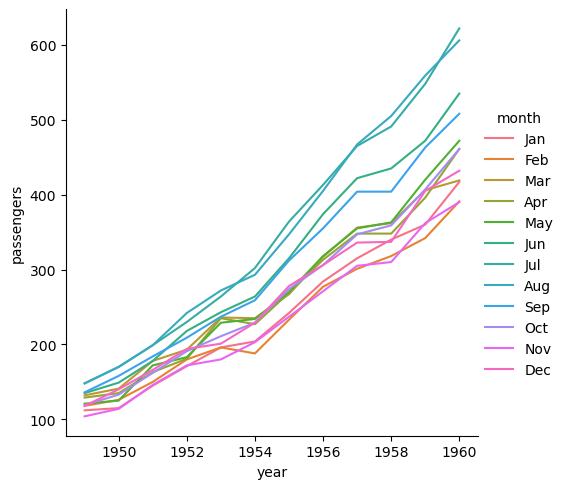

In [3]:
flights_dict = flights.to_dict()
sns.relplot(data = flights_dict, x = 'year', y = 'passengers', hue = 'month', kind = 'line')

그룹별 split-apply-combine과 같은 많은 pandas 연산은 정보가 입력 데이터 프레임의 열에서 출력의 인덱스로 이동한 데이터 프레임을 생성한다. 이름이 유지되는 한, 정상적으로 데이털르 참조할 수 있다.

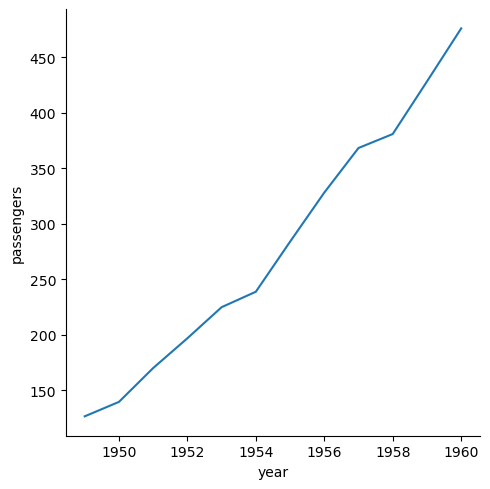

In [4]:
flights_avg = flights.groupby('year').mean()
sns.relplot(data = flights_avg, x = 'year', y = 'passengers', kind = 'line')

또한 데이터 벡터를 `x`,`y` 및 기타 플로팅 변수에 대한 인수로 직접 전달할 수도 있다. 이러한 벡터가 pandas의 객체인 경우 이름 속성을 사용하여 plot에 레이블을 지정한다

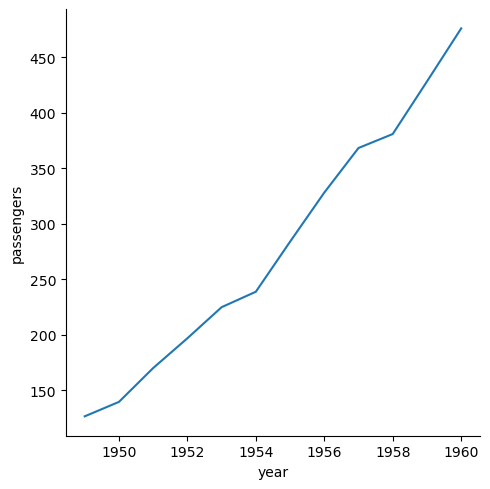

In [7]:
year = flights_avg.index
passengers = flights_avg['passengers']
sns.relplot(x = year, y = passengers, kind = 'line')

Numpy 배열 및 파이썬 시퀀스 인터페이스를 구현하는 기타 객체도 작동하지만, 이름이 없으면 추가 조정없이는 플롯의 정보가 충분하지 않다.

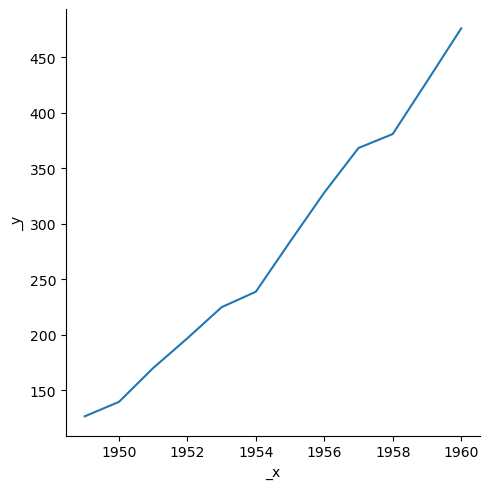

In [8]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")